# Template matching metrics and non-maxima supression

<p>This notebook compares the performane of the template matching metrics

<small>Author: Fernando Carlos López Hernández</small>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_square(I, center, size):
    top_left = (center[0]-size[0]//2, center[1]-size[1]//2)
    bottom_right = (center[0]+size[0]//2, center[1]+size[1]//2)
    cv2.rectangle(I, top_left, bottom_right, (255,0,0), 8)

Load the search image and template in grayscale


In [2]:
I = cv2.imread('images/sky.png', cv2.IMREAD_GRAYSCALE)
T = cv2.imread('images/bird.png', cv2.IMREAD_GRAYSCALE)

We compute the matching spaces using 4 metrics

In [3]:
M_SQDIFF = cv2.matchTemplate(I,T,cv2.TM_SQDIFF)
M_CCORR = cv2.matchTemplate(I,T,cv2.TM_CCORR)
M_CCORR_NORMED = cv2.matchTemplate(I,T,cv2.TM_CCORR_NORMED)
M_CCOEFF = cv2.matchTemplate(I,T,cv2.TM_CCOEFF)

Then we normalize the metrics to the range 0..255

In [4]:
N_SQDIFF = cv2.normalize(M_SQDIFF, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
N_CCORR = cv2.normalize(M_CCORR, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
N_CCORR_NORMED = cv2.normalize(M_CCORR_NORMED, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
N_CCOEFF = cv2.normalize(M_CCOEFF, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

And show the matching spaces

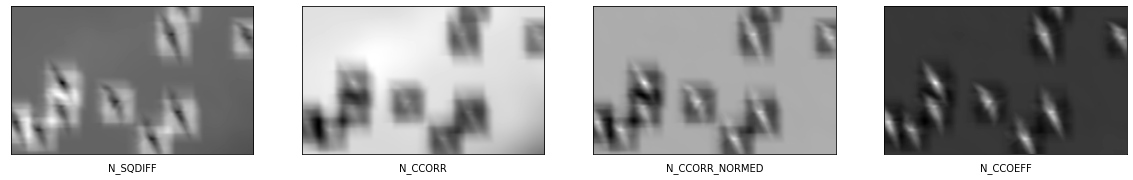

In [5]:
fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(141)
ax1.imshow(N_SQDIFF, cmap = "gray"); ax1.set_xlabel("N_SQDIFF")
ax2 = fig.add_subplot(142)
ax2.imshow(N_CCORR, cmap = "gray"); ax2.set_xlabel("N_CCORR")
ax3 = fig.add_subplot(143)
ax3.imshow(N_CCORR_NORMED, cmap = "gray"); ax3.set_xlabel("N_CCORR_NORMED")
ax4 = fig.add_subplot(144)
ax4.imshow(N_CCOEFF, cmap = "gray"); ax4.set_xlabel("N_CCOEFF")
for ax in fig.axes:
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])

Find the most similar locations, and then mark the template square centered in the located point

In [6]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(M_SQDIFF)
C_SQDIFF = cv2.cvtColor(N_SQDIFF, cv2.COLOR_GRAY2RGB).astype('int32')
draw_square(C_SQDIFF, min_loc, T.shape)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(M_CCORR)
C_CCORR = cv2.cvtColor(N_CCORR, cv2.COLOR_GRAY2RGB).astype('int32')
draw_square(C_CCORR, max_loc, T.shape)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(M_CCORR_NORMED)
C_CORR_NORMED = cv2.cvtColor(N_CCORR_NORMED, cv2.COLOR_GRAY2RGB).astype('int32')
draw_square(C_CORR_NORMED, max_loc, T.shape)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(M_CCOEFF)
C_CCOEFF = cv2.cvtColor(N_CCOEFF, cv2.COLOR_GRAY2RGB).astype('int32')
draw_square(C_CCOEFF, max_loc, T.shape)

Show the located object

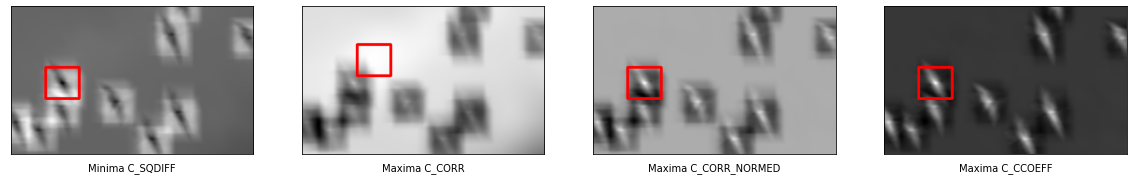

In [7]:
fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(141)
ax1.imshow(C_SQDIFF); ax1.set_xlabel("Minima C_SQDIFF")
ax2 = fig.add_subplot(142)
ax2.imshow(C_CCORR); ax2.set_xlabel("Maxima C_CORR")
ax3 = fig.add_subplot(143)
ax3.imshow(C_CORR_NORMED); ax3.set_xlabel("Maxima C_CORR_NORMED")
ax4 = fig.add_subplot(144)
ax4.imshow(C_CCOEFF); ax4.set_xlabel("Maxima C_CCOEFF")
for ax in fig.axes:
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])